In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("housing.csv")

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()
# total_bedrooms has some non null values so we have to deal with that.
# one more thing to notice is that all the fields are float except ocean_proximity,
# which is an object, so we will have to fix that as well.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)
#inplace=True is needed so that this change can be applied on the real dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
 #we have to divide our dataset into training and testing set.
from sklearn.model_selection import train_test_split
 
x = data.drop(['median_house_value'], axis=1) #axis here because we are dropping a colum. x is the dataframe without target variable
y = data['median_house_value'] #only the target column

In [17]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2) #test size tells how much data we want to use for testing purpose

In [26]:
#we join x and y train data to check correlations
train_data = x_train.join(y_train)

In [27]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1614,-122.09,37.86,27.0,5484.0,760.0,2212.0,770.0,7.6202,NEAR BAY,402600.0
6218,-117.92,34.07,29.0,1699.0,399.0,1052.0,411.0,3.2122,<1H OCEAN,195500.0
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,<1H OCEAN,318500.0
19470,-120.99,37.67,16.0,568.0,124.0,307.0,116.0,2.1518,INLAND,107400.0
5206,-118.28,33.93,41.0,936.0,257.0,913.0,226.0,2.0313,<1H OCEAN,122600.0
...,...,...,...,...,...,...,...,...,...,...
17735,-121.81,37.30,15.0,1929.0,345.0,1683.0,347.0,5.5248,<1H OCEAN,235600.0
441,-122.30,37.87,52.0,3123.0,749.0,1695.0,684.0,2.2208,NEAR BAY,144800.0
9896,-122.26,38.29,10.0,969.0,160.0,482.0,180.0,6.5799,NEAR BAY,218100.0
14129,-117.09,32.75,20.0,1701.0,503.0,1482.0,465.0,1.6789,NEAR OCEAN,95500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

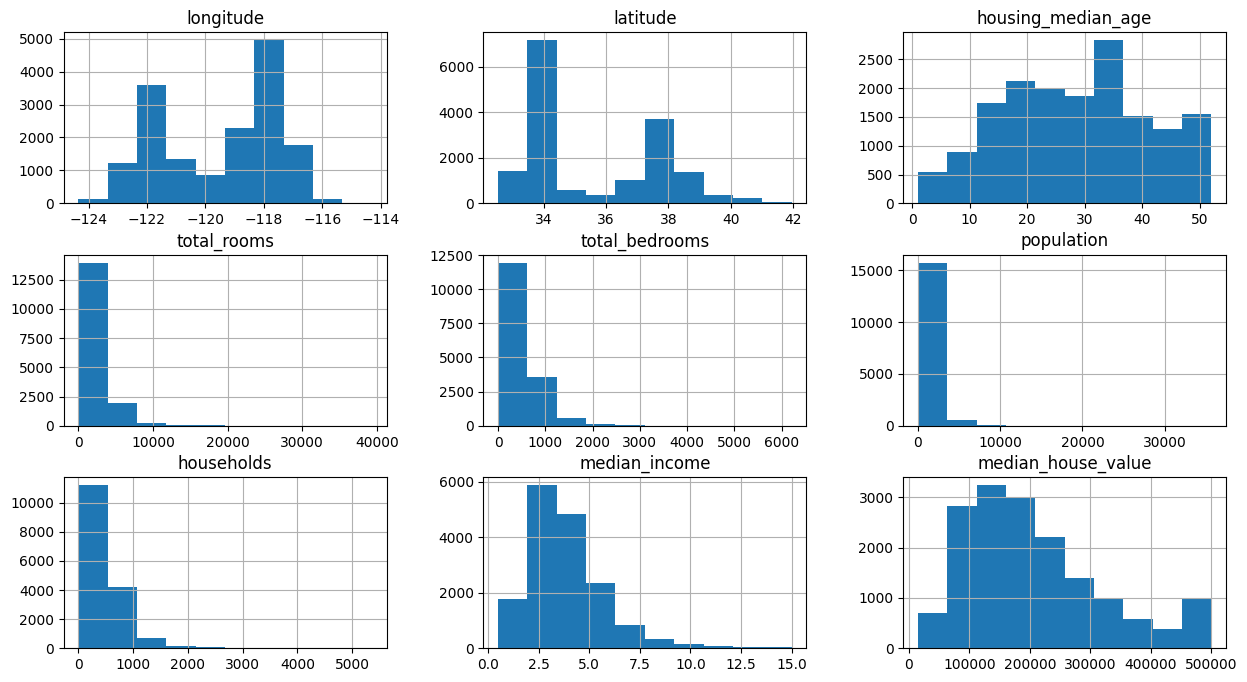

In [28]:
train_data.hist(figsize=(15, 8))

<Axes: >

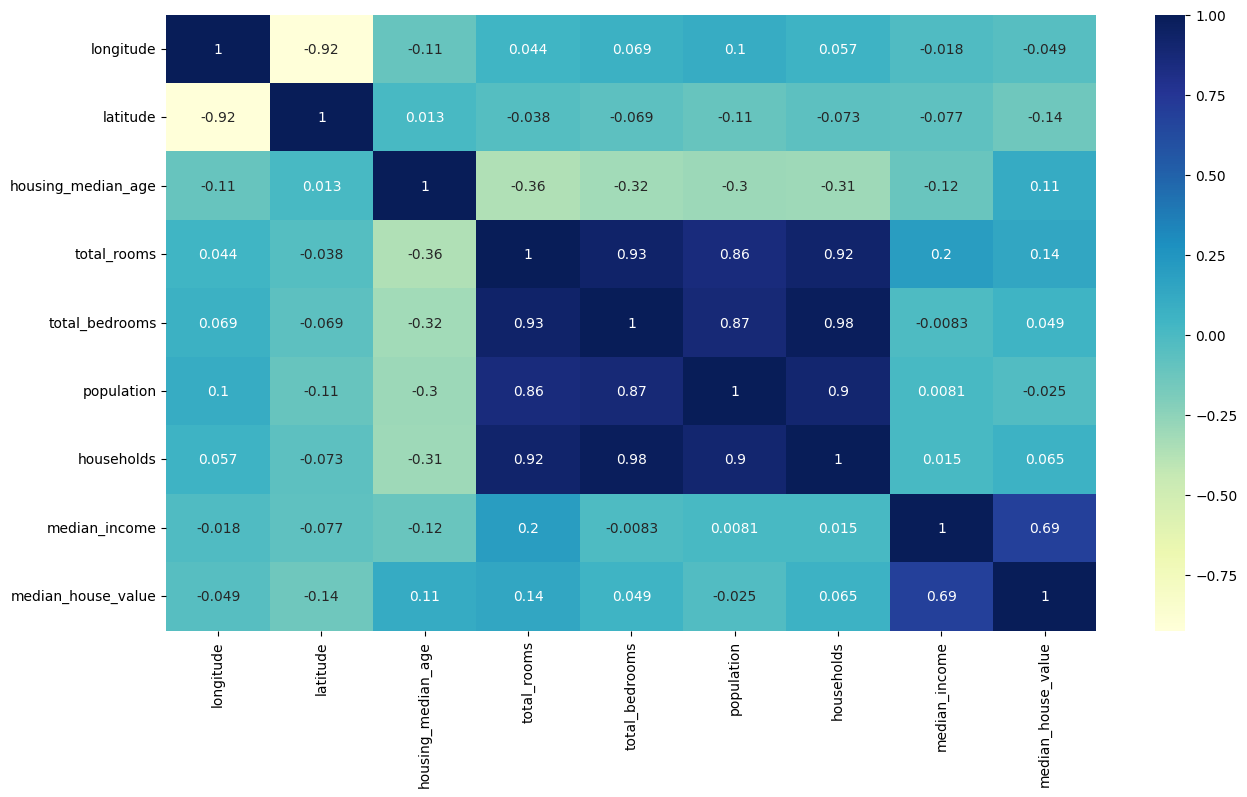

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")
#.corr will show correlation between features. and select_dtypes(include=['number']) this ensures we skip the non number fields - ocean proximity

In [32]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

so we did wat we did above to make the data distribution look more nice and even, since earlier it was all skewed and now its looking better.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

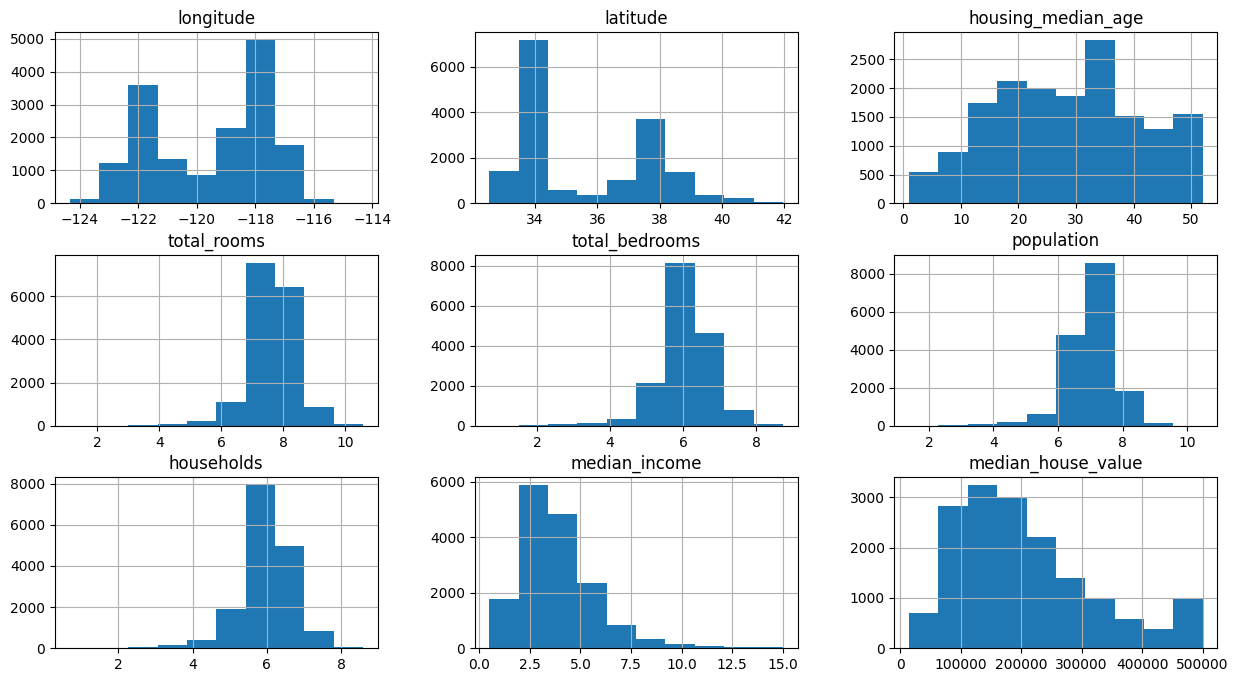

In [33]:
train_data.hist(figsize=(15,8))

ocean proximity feature is infact quite important for predicting the price since the closer a house is to ocean the more higher prices will be. but since the data is in string format we have to do some processing and for that we are going to split the features into subfeatures, having binary values.

In [ ]:
train_data.ocean_proximity.value_counts() #checking what kind of values we have

ocean_proximity
<1H OCEAN     7247
INLAND        5165
NEAR OCEAN    2131
NEAR BAY      1800
ISLAND           3
Name: count, dtype: int64

what we are doing below is hot encoding of the ocean_proximity. we first get the fields through get_dummies, then remove the ocean proximity since its not needed anymore, then we save it in train_data

In [38]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

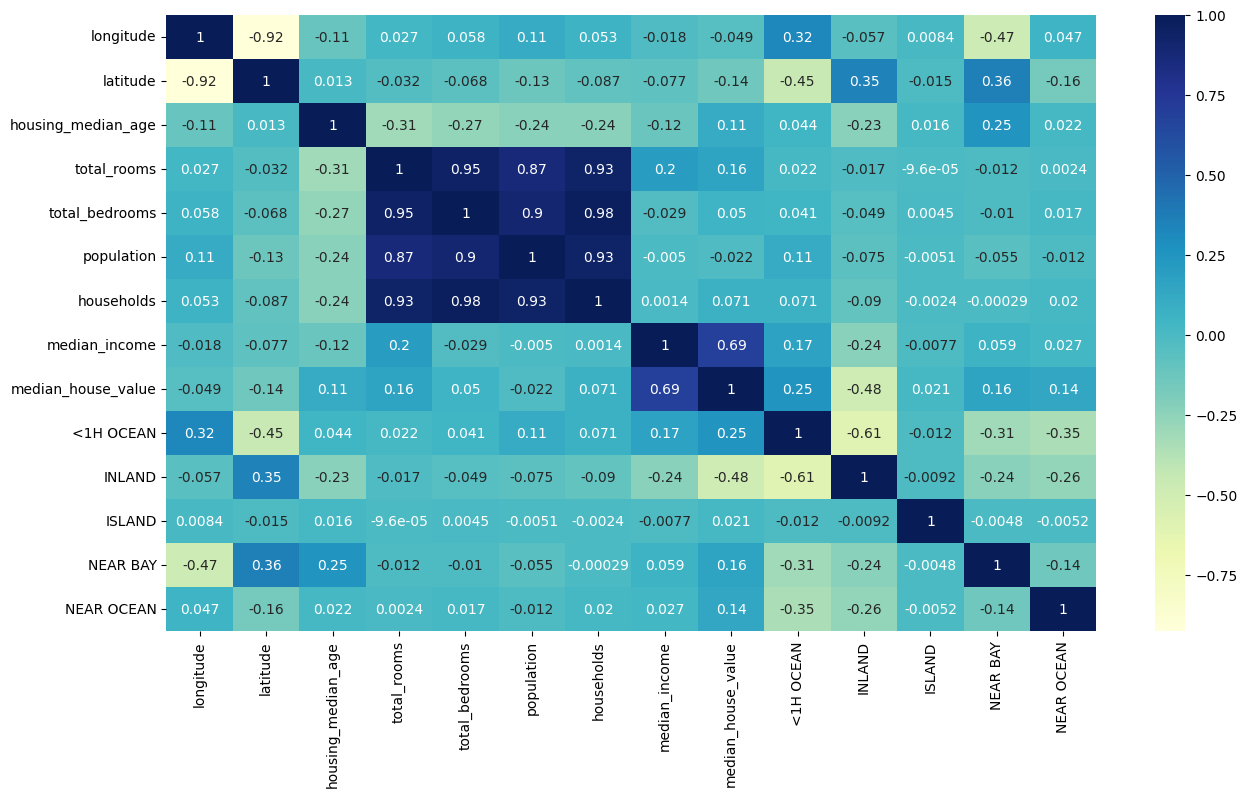

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

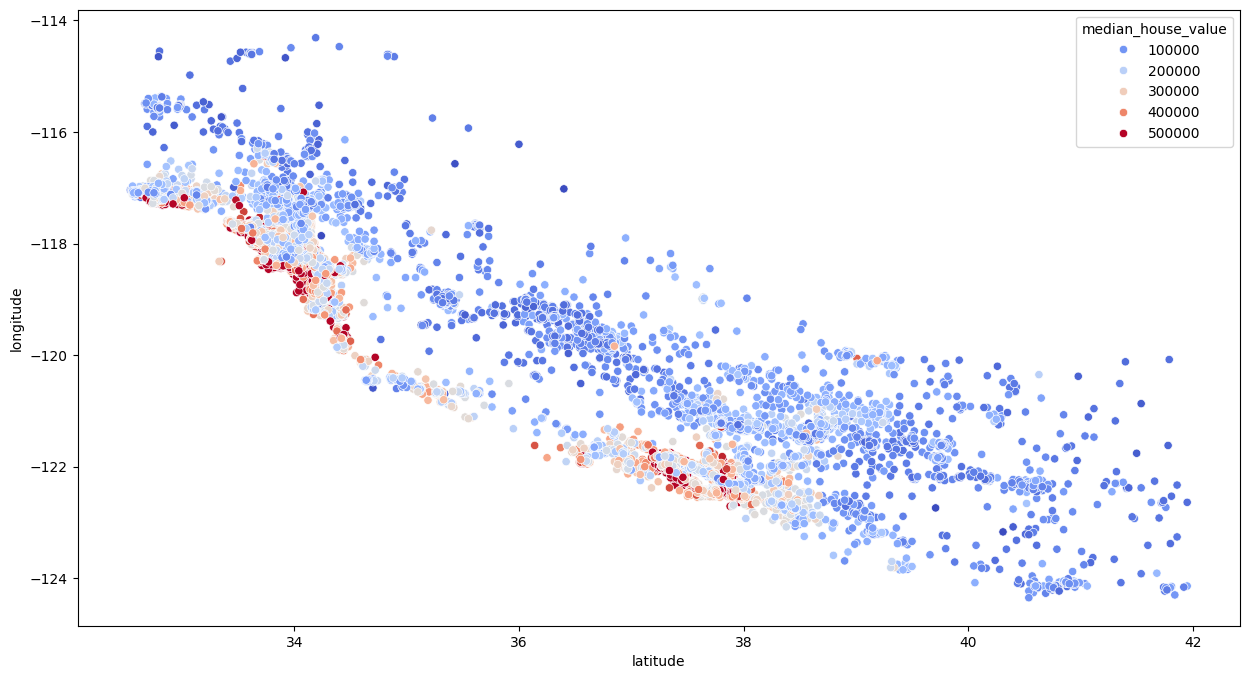

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

above we just tried to see how a particular feature affects the price of the houses, and here are checking how latitude and longitude are affecting it. the closer it is to coast- that is, the less longitude and less latitude, the pricier it is.

In [45]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

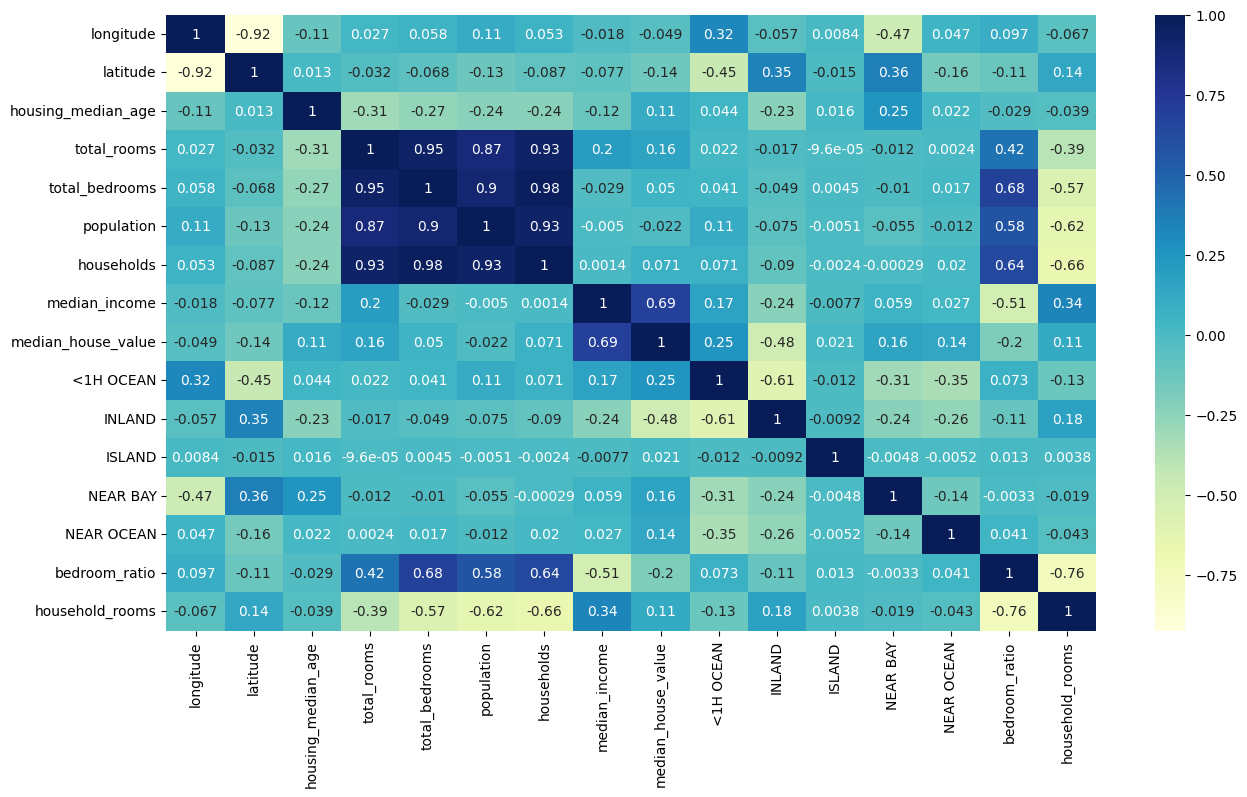

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

so we did some more feature engineering here, and tried to make two more features that would give us better picture- bedroom ratio and household rooms since its possible that these factors would affect the price - the higher the number of bedrooms more will be the price etc. if we see the previous map, the total rooms and total bedrooms especially, did not have much relation or much affect but these new features we engineered are interesting and affecting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

#used this scaler for sclaing data

reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


we are doing this below thing because we ended up doing all feature engineering on the training data instead of whole data. so we need to do the same thing with test data as well.

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [55]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [63]:
x_test_s = scaler.transform(x_test)

one thing here is, the island feature, if we didnt have any positive value for island feature in our testing data, the dataset will not have the island feature. so that means we should always check if the number of colums for both testing and training data are same or not

In [59]:
# train_data
# test_data
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1614,-122.09,37.86,27.0,8.609772,6.634633,7.702104,6.647688,7.6202,False,False,False,True,False,0.770593,1.295153
6218,-117.92,34.07,29.0,7.438384,5.991465,6.959399,6.021023,3.2122,True,False,False,False,False,0.805479,1.235402
11632,-118.03,33.82,20.0,7.887209,6.142037,7.151485,6.159095,6.0162,True,False,False,False,False,0.778734,1.280579
19470,-120.99,37.67,16.0,6.343880,4.828314,5.730100,4.762174,2.1518,False,True,False,False,False,0.761098,1.332140
5206,-118.28,33.93,41.0,6.842683,5.552960,6.817831,5.424950,2.0313,True,False,False,False,False,0.811518,1.261336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17735,-121.81,37.30,15.0,7.565275,5.846439,7.428927,5.852202,5.5248,True,False,False,False,False,0.772799,1.292723
441,-122.30,37.87,52.0,8.046870,6.620073,7.436028,6.529419,2.2208,False,False,False,True,False,0.822689,1.232402
9896,-122.26,38.29,10.0,6.877296,5.081404,6.180017,5.198497,6.5799,False,False,False,True,False,0.738867,1.322939
14129,-117.09,32.75,20.0,7.439559,6.222576,7.301822,6.144186,1.6789,False,False,False,False,True,0.836417,1.210829


In [60]:
reg.score(x_test, y_test)

0.6677218593163095

In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
forest.score(x_test, y_test)

c:\Users\Mimansa Tripathi\Desktop\projects\python-practice\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-0.024249806036391375

In [70]:
#cross validation - k folds
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring="neg_mean_squared_error", 
                           return_train_score=True)
grid_search.fit(x_train_s, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [73]:
best_forest = grid_search.best_estimator_

In [74]:
best_forest.score(x_test, y_test)

c:\Users\Mimansa Tripathi\Desktop\projects\python-practice\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-2.655766728141726